In [1]:
from glycan import glycan
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [2]:
def read_MDCK_data():
    # Create an instance of the glycan class
    g2 = glycan()

    # Read data (CSV files) as pandas data frames. Each file is a new line.
    # Note that each file can have multiple experiments, called "tabs" here.
    # You can specify how many tabs you want to read using the totalTabs variable.
    numberedExcel2, b = g2.getData('Data/H1N1_MDCK/MDCK_sheet2.csv', totalTabs=1, startExp=1)
    numberedExcel3, b = g2.getData('Data/H1N1_MDCK/MDCK_sheet3.csv', totalTabs=1, startExp=(b+1))
    numberedExcel4, b = g2.getData('Data/H1N1_MDCK/MDCK_sheet4.csv', totalTabs=2, startExp=(b+1))

    # Now combine all the data frames
    numberedExcel_temp = pd.concat([numberedExcel2, numberedExcel3, numberedExcel4], axis=0)
    mdck = numberedExcel_temp

    mdck.reset_index(drop=True, inplace=True)
    # Scaling the mean viral fluorescence by glycan density.
    mdck['MVF'] = mdck.MVF/mdck.GlycDen
    return mdck

In [3]:
mdck = read_MDCK_data()

# New cutoff for H1N1_MDCK is 0.03
cutoff = 0.03

g2 = glycan()
# Randomly split data into training and testing.
X_train, Y_train, X_test, Y_test, minMaxList = g2.getTrainTest(mdck, cutoff = cutoff, dropDP=True)

# Create an SVM classifier
clf = svm.SVC(verbose=False)

# Train algorithm
clf.fit(X_train, Y_train)

# Make predictions on the training data
preds1 = clf.predict(X_train)

# Make predictions with the testing data.
# This is what is used for validation
preds = clf.predict(X_test)

For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header


/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_read.py:162: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_read.py:162: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_read.py:162: SettingWithCopyWarning:


A va

In [4]:
# Calculate confusion matrix
cf = confusion_matrix(Y_test, preds)

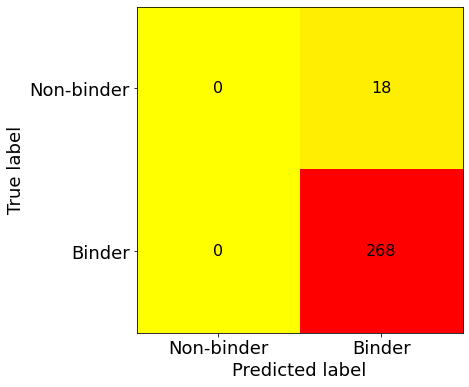

In [5]:
g2.plotConfusion(cf, ['Non-binder', 'Binder'])
plt.savefig("Plots/SVM_test_H1N1_MDCK.pdf")